## Embedded Method


本节代码包括：
-  随机森林特征重要性
-  随机森林 + RFE 

本节使用的数据集是 Kaggle Santander 的数据。该文件已经上传至 /data 目录。

如需自己下载，下载地址[Kaggle website](https://www.kaggle.com/c/santander-customer-satisfaction/data)。 注意请下载 train.csv，并更名为 st.csv 放置在 /data 目录下。

###  数据准备

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [2]:
# 读取数据
data = pd.read_csv('../data/santander.csv', nrows=50000)
data.shape

(50000, 371)

In [3]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
# 我们只用数值变量进行演示

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 371)

In [5]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['TARGET', 'ID'], axis=1),
    data['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 369), (15000, 369))

###  随机森林特征重要性

In [6]:
# 训练随机森林
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [8]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
feat_labels = X_train.columns
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0) #  inter-trees variability. 衡量所有树中该特征的波动性
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))


Feature ranking:
1. feature no:368 feature name:var38 (0.354224)
2. feature no:1 feature name:var15 (0.185845)
3. feature no:331 feature name:saldo_medio_var5_ult3 (0.031465)
4. feature no:329 feature name:saldo_medio_var5_hace3 (0.029508)
5. feature no:326 feature name:num_var45_ult3 (0.021791)
6. feature no:324 feature name:num_var45_hace3 (0.017479)
7. feature no:328 feature name:saldo_medio_var5_hace2 (0.016288)
8. feature no:190 feature name:saldo_var42 (0.016102)
9. feature no:182 feature name:saldo_var30 (0.015871)
10. feature no:277 feature name:num_var22_ult3 (0.015637)
11. feature no:323 feature name:num_var45_hace2 (0.015636)
12. feature no:330 feature name:saldo_medio_var5_ult1 (0.014110)
13. feature no:164 feature name:saldo_var5 (0.012796)
14. feature no:325 feature name:num_var45_ult1 (0.011646)
15. feature no:275 feature name:num_var22_hace3 (0.011380)
16. feature no:274 feature name:num_var22_hace2 (0.010448)
17. feature no:279 feature name:num_med_var45_ult3 (0.010273

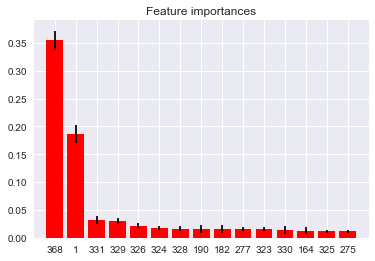

In [41]:
# 对 top 15的特征作图。
# 纵轴是重要性，黑色竖线是在所有tree上的波动(标准差)
indices_top15 = indices[0:15]
plt.figure()
plt.title("Feature importances")
plt.bar(range(15), importances[indices_top15],
       color="r", yerr=std[indices_top15], align="center")
plt.xticks(range(15), indices_top15)
plt.xlim([-1,15])
plt.show()

In [47]:
# 选择重要性 > 某阈值的变量，也可以选择例如 1.5*median 2*mean的形式
from sklearn.feature_selection import SelectFromModel


# 如果选择重要性 >0.05 的特征，则只有368号和1号特征入选
feature_selection = SelectFromModel(model, threshold=0.05,prefit=True) 
selected_feat = X_train.columns[(feature_selection.get_support())]
selected_feat

Index(['var15', 'var38'], dtype='object')

In [59]:
# 如果选择重要性 > 2倍中位数 的特征，则有163个特征入选
feature_selection2 = SelectFromModel(model, threshold='2*median',prefit=True) 
selected_feat2 = X_train.columns[(feature_selection2.get_support())]
selected_feat2

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3',
       'imp_op_var40_ult1', 'imp_op_var41_comer_ult1',
       ...
       'saldo_medio_var8_ult1', 'saldo_medio_var8_ult3',
       'saldo_medio_var12_hace2', 'saldo_medio_var12_hace3',
       'saldo_medio_var12_ult1', 'saldo_medio_var12_ult3',
       'saldo_medio_var13_corto_hace2', 'saldo_medio_var13_corto_ult1',
       'saldo_medio_var13_corto_ult3', 'var38'],
      dtype='object', length=163)

### 随机森林 + Recursive feature selection 

In [60]:
from sklearn.feature_selection import RFE
#  n_features_to_select 决定递归的停止条件，这里是递归到只剩 10 个特征
# 注意，该方法在候选特征空间很大时，可能非常耗时。 本数据集执行该段代码耗时约 1 hour
sel_ = RFE(RandomForestClassifier(n_estimators=100), n_features_to_select=10)
sel_.fit(X_train.fillna(0), y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [61]:
# 观察被挑选出的 TOP 10 个特征
selected_feat = X_train.columns[(sel_.get_support())]
print(selected_feat)

Index(['var15', 'saldo_var30', 'saldo_var42', 'num_var22_ult3',
       'num_var45_ult3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'var38'],
      dtype='object')
